In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()




('2017-08-23')

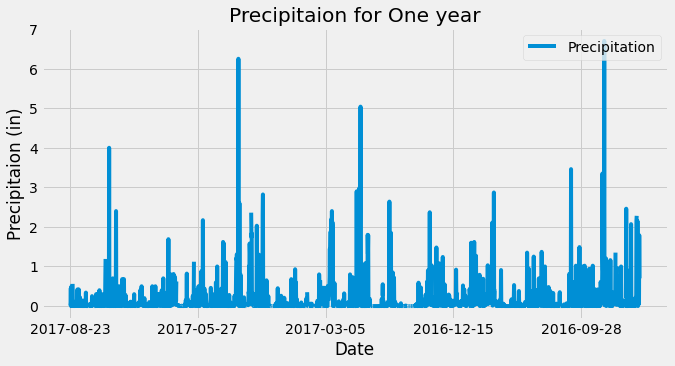

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
lastest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year_from_lastest_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
scores_in_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_from_lastest_date).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(scores_in_12_months, columns=['Date', 'Precipitation'])
precip_df.set_index("Date", inplace = True)
#precip_df.head(10)


# Sort the dataframe by date

precip_df.sort_values('Date', ascending=True)
precip_df.head(10)
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title = "Precipitaion for One year", figsize=(10,5))
plt.legend(loc = 'upper right')
plt.xlabel("Date")
plt.ylabel('Precipitaion (in)')
plt.show()



In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Station).count()
print(f' There are total {total_station_count} station in the dataset')

 There are total 9 station in the dataset


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

temp_most_active_staion = [lowest_temp,highest_temp, avg_temp]
order_by(Measurement.date.desc()).all()
#temp_one_year_df = pd.DataFrame(temp_one_year)
#temp_one_year_df




[[(54.0)], [(85.0)], [(71.66378066378067)]]

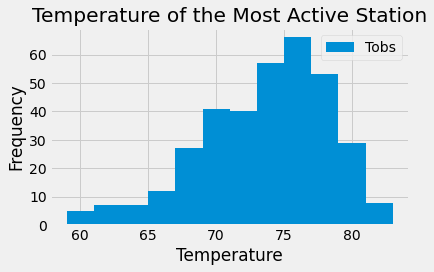

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_one_year = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= one_year_from_lastest_date).\
            order_by(Measurement.date.desc()).all()
temp_one_year_df = pd.DataFrame(temp_one_year, columns=["Tobs"])

plt.hist(temp_one_year_df['Tobs'],bins=12)
plt.title("Temperature of the Most Active Station")
plt.legend(["Tobs"],loc='upper right')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




# Close session

In [39]:
# Close Session
session.close()